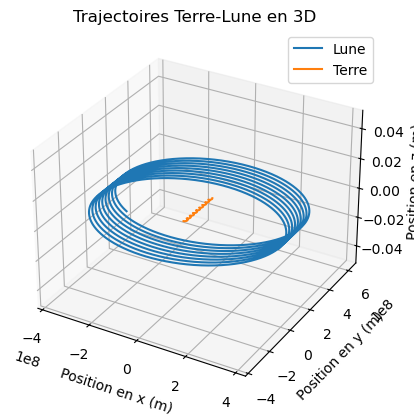

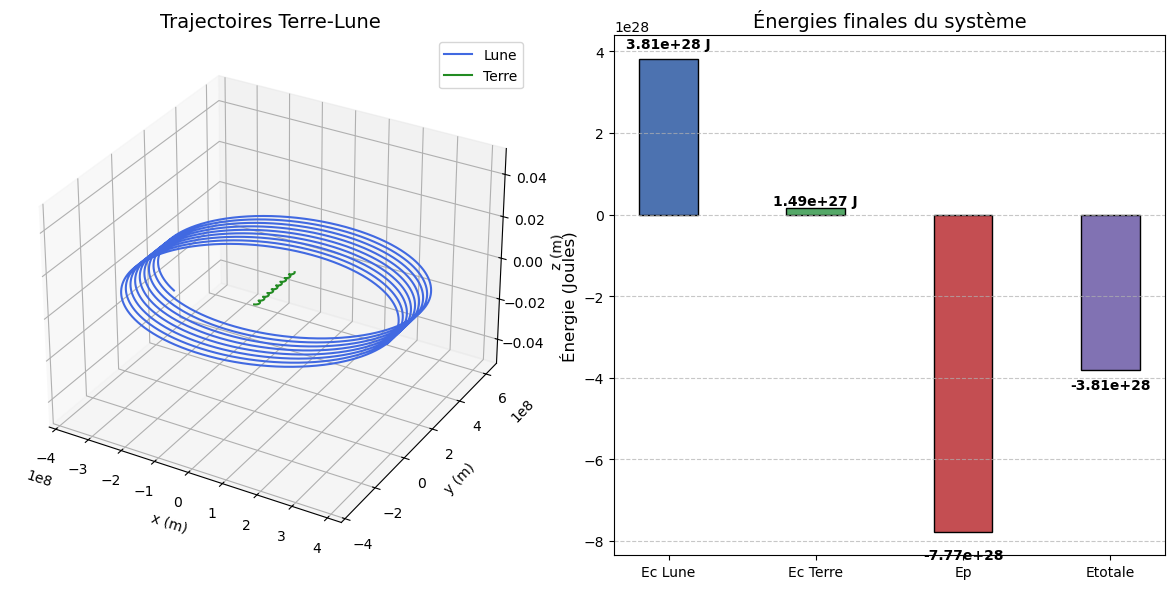

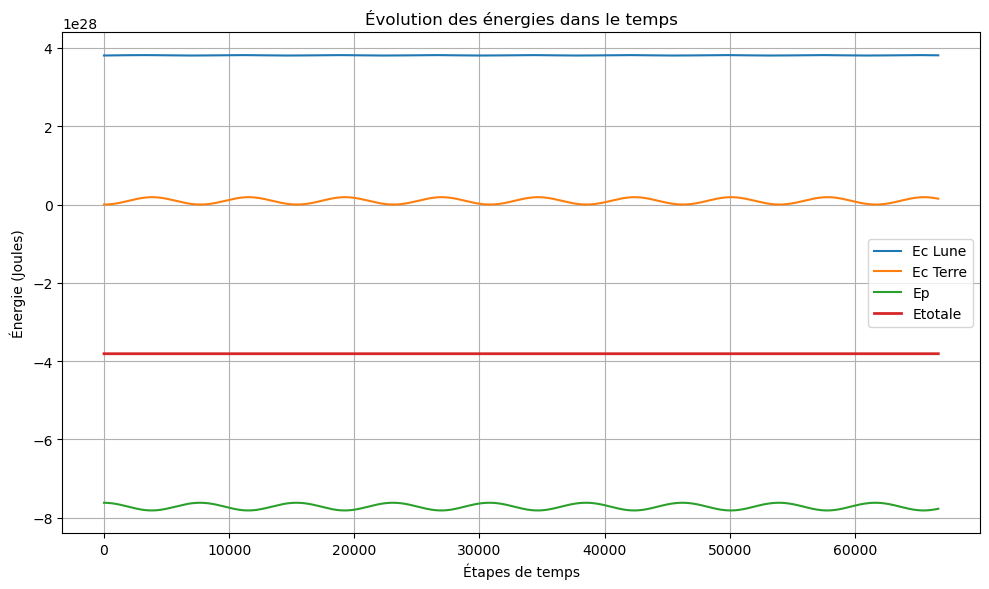

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


G = 6.67430e-11
MTerre = 5.97219e24
MLune = 7.3477e22
debug = False

Position_Earth = [0,0,0]
'''xT = 0
yT = 0
zT = 0'''

Position_Moon = [3.844e8, 0, 0]
'''xL = 3.844e8
yL = 0
zL = 0'''

Velocity_Earth = [0,0,0]
'''vT_x = 0.0
vT_y = 0.0
vT_z = 0.0'''

Velocity_Moon = [0,1018,0]
'''vL_x = 0.0
vL_y = 1000 #m.s^-1
vL_z = 500.0'''

# 1000 m.s^-1


# l'intervalle de temps au bout de laquelle on calcule la nouvelle position
dT = 300


Ec_list = []
energie_totale_list = []


# avancement du temps
t = 60

#------------------------------------------------------------------------------------------------------------------------------
# def calcul_distance(x1, y1, z1, x2, y2, z2):
def calcul_distance(PosEarth, PosMoon):
    Distance = [
        PosMoon[0] - PosEarth[0], 
        PosMoon[1] - PosEarth[1], 
        PosMoon[2] - PosEarth[2]
    ]

    d = math.sqrt(Distance[0]**2 + Distance[1]**2 + Distance[2]**2)
    return Distance, d


def calcul_force_gravitationnelle(G, M1, M2, Distance, d):

    F = G * M1 * M2 / d**2
    GravitationalForce = [
        -F * Distance[0] / d,
        -F * Distance[1] / d,
        -F * Distance[2] / d
    ]
    return GravitationalForce

def calcul_acceleration(GravitationalForce, M):
    Acceleration = [
        GravitationalForce[0]/M,   
        GravitationalForce[1]/M,
        GravitationalForce[2]/M,
    ]
    return Acceleration

def mise_a_jour_vitesse(Velocity, Acceleration, dT):
    Velocity[0] += Acceleration[0] * dT
    Velocity[1] += Acceleration[1] * dT
    Velocity[2] += Acceleration[2] * dT
    return Velocity


def mise_a_jour_position(Position, Velocity, dT):
    Position[0] += Velocity[0]*dT
    Position[1] += Velocity[1]*dT
    Position[2] += Velocity[2]*dT
    return Position


def calcul_Ec (m, Velocity):
    v = math.sqrt(Velocity[0]**2+Velocity[1]**2+Velocity[2]**2)
    Ec = 0.5*m*v**2
    return Ec


def calcul_energie_potentielle(G, M1, M2, d):
    Epp = -G * M1 * M2 / d
    return Epp


# -------------------------------------------  représentation graphique  -------------------------------------------------------

# 1) stocker les infos : Le programme calcule les positions à chaque instant, mais si je ne les stockes pas quelque part,
# je ne pourras pas les tracer à la fin. Les listes vont conserver un historique des positions.

# position initial de la Lune = xL, yL
xL_list = [Position_Moon[0]]
yL_list = [Position_Moon[1]]
zL_list = [Position_Moon[2]]
xT_list = [Position_Earth[0]]
yT_list = [Position_Earth[1]]
zT_list = [Position_Earth[2]]

Ec_Lune_list = []
Ec_Terre_list = []
Ep_list = []
Etotale_list = []



Tmax = 20000000

while t < Tmax:

    # 1. Mise à jour des positions relatives
    #    et calcul de la distance entre les deux astres avec le théorème de Pythagore 3 dimensions
    Distance, d = calcul_distance(Position_Earth, Position_Moon)
 
    # 2. Force gravitationnelle (norme)
    GravitationalForce_Moon = calcul_force_gravitationnelle(G, MTerre, MLune, Distance, d)

    # 3. Décomposition de la force
    GravitationalForce_Earth = [
        -GravitationalForce_Moon[0],
        -GravitationalForce_Moon[1],
        -GravitationalForce_Moon[2]
    ]

    # 4. accélération Lune
    Acceleration_Moon = calcul_acceleration(GravitationalForce_Moon, MLune)
    Acceleration_Earth = calcul_acceleration(GravitationalForce_Earth, MTerre)


    # 5. Mise à jour des vitesses
    Velocity_Moon = mise_a_jour_vitesse(Velocity_Moon, Acceleration_Moon, dT)
    Velocity_Earth = mise_a_jour_vitesse(Velocity_Earth, Acceleration_Earth, dT)


    # 6. Mise à jour des positions
    Position_Moon = mise_a_jour_position(Position_Moon, Velocity_Moon, dT)
    Position_Earth = mise_a_jour_position(Position_Earth, Velocity_Earth, dT)



    # 7. Stockage des positions
    xL_list.append(Position_Moon[0])
    yL_list.append(Position_Moon[1])
    zL_list.append(Position_Moon[2])

    xT_list.append(Position_Earth[0])
    yT_list.append(Position_Earth[1])
    zT_list.append(Position_Earth[2])


    # print(xL_list)

    # 8. Temps
    t += dT

    # 9. Énergie (après mise à jour des positions)

    # Recalcul de la distance pour avoir le bon d au même instant
    Distance, d = calcul_distance(Position_Earth, Position_Moon)

    # Énergies cinétiques et potentielle
    Ec_Lune = calcul_Ec(MLune, Velocity_Moon)
    Ec_Terre = calcul_Ec(MTerre, Velocity_Earth)
    Ep = calcul_energie_potentielle(G, MTerre, MLune, d)
    Etot = Ec_Lune + Ec_Terre + Ep

    # Stockage
    Ec_Lune_list.append(Ec_Lune)
    Ec_Terre_list.append(Ec_Terre)
    Ep_list.append(Ep)
    Etotale_list.append(Etot)


    











# Création d'une figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xL_list, yL_list, zL_list, label="Lune")
ax.plot(xT_list, yT_list, zT_list, label="Terre")

ax.set_xlabel("Position en x (m)")
ax.set_ylabel("Position en y (m)")
ax.set_zlabel("Position en z (m)")
ax.set_title("Trajectoires Terre-Lune en 3D")
ax.legend()
plt.show()



# Affichage Energie


# Créer une figure avec 2 sous-graphes côte à côte
fig = plt.figure(figsize=(12, 6))

# --------- Sous-graphe 1 : Trajectoires 3D ---------
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(xL_list, yL_list, zL_list, label="Lune", color="royalblue")
ax1.plot(xT_list, yT_list, zT_list, label="Terre", color="forestgreen")

ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)")
ax1.set_zlabel("z (m)")
ax1.set_title("Trajectoires Terre-Lune", fontsize=14)
ax1.legend()

# --------- Sous-graphe 2 : Graphique en bâtons des énergies ---------

# Données finales
Ec_Lune = Ec(MLune, Velocity_Moon)
Ec_Terre = Ec(MTerre, Velocity_Earth)
Ep = energie_potentielle(G, MTerre, MLune, d)
Etot = Ec_Lune + Ec_Terre + Ep

noms = ['Ec Lune', 'Ec Terre', 'Ep', 'Etotale']
valeurs = [Ec_Lune, Ec_Terre, Ep, Etot]
couleurs = ['#4C72B0', '#55A868', '#C44E52', '#8172B3']  # Palette douce

ax2 = fig.add_subplot(122)
barres = ax2.bar(noms, valeurs, width=0.4, color=couleurs, edgecolor='black')

# Afficher les valeurs numériques sur les barres
for i, bar in enumerate(barres):
    y = bar.get_height()
    offset = abs(y) * 0.05  # Décalage vertical (5% de la hauteur)

    # Si positif, placer le texte au-dessus ; si négatif, en dessous
    if y >= 0:
        ax2.text(
            bar.get_x() + bar.get_width() / 2,
            y + offset,
            f"{valeurs[i]:.2e} J",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold"
        )
    else:
        ax2.text(
            bar.get_x() + bar.get_width() / 2,
            y - offset,
            f"{valeurs[i]:.2e}",
            ha="center",
            va="top",
            fontsize=10,
            fontweight="bold"
        )


ax2.set_title("Énergies finales du système", fontsize=14)
ax2.set_ylabel("Énergie (Joules)", fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Ec_Lune_list, label="Ec Lune")
plt.plot(Ec_Terre_list, label="Ec Terre")
plt.plot(Ep_list, label="Ep")
plt.plot(Etotale_list, label="Etotale", linewidth=2)

plt.xlabel("Étapes de temps")
plt.ylabel("Énergie (Joules)")
plt.title("Évolution des énergies dans le temps")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


